In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'../code')
import utils as ut
fn = 'input.txt'

## 1

In [3]:
inp = ut.rl(fn)

In [4]:
totcoords = []
for lines in inp:
    coords = lines.split(' -> ')
    for i in range(len(coords)-1):
        coord1 = [int(c) for c in coords[i].split(',')]
        coord2 = [int(c) for c in coords[i+1].split(',')]
        step1, step2 = 1,1
        if coord1[0] > coord2[0]:
            step1 = -1
        if coord1[1] > coord2[1]:
            step2 = -1
        l1 = list(range(coord1[0],coord2[0]+step1,step1))
        l2 = list(range(coord1[1],coord2[1]+step2,step2))
        lenl1 = len(l1)
        lenl2 = len(l2)
        l1 = l1*lenl2
        l2 = l2*lenl1
        cs = list(zip(l2,l1))
        #print(cs)
        totcoords.extend(cs)

In [5]:
import numpy as np
#np.array(totcoords).min(axis = 0)
roof = np.zeros(np.array(totcoords).max(axis = 0)+np.array([1,1]))

In [6]:
for coord in totcoords:
    roof[coord] = 1

In [7]:
from dataclasses import dataclass
from typing import Callable
from typing import List

@dataclass
class Sand:
    x: int 
    y: int
    fallen: bool = False
    
    def move(self):
        while True:
            try:
                #print('move!')
                if roof[self.y+1,self.x] == 0:
                    self.y += 1
                elif roof[self.y+1,self.x-1] == 0:
                    self.x -= 1
                    self.y += 1
                elif roof[self.y+1,self.x+1] == 0:
                    self.x += 1
                    self.y += 1
                else:
                    roof[self.y,self.x] = 2
                    #print(f'At rest at {self.y,self.x}')
                    break
            except:
                print('OoB')
                self.fallen = True
                break
                

In [8]:
sands = 0
while True:
    s = Sand(500,0)
    sands += 1
    s.move()
    if s.fallen:
        sands -= 1
        break

OoB


In [9]:
sands

1072

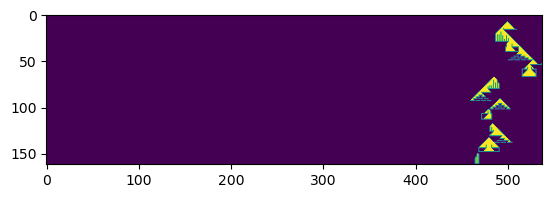

In [10]:
import matplotlib.pyplot as plt
plt.imshow(roof)

## 2

In [11]:
x = list(range(0,1000))

In [12]:
y = [np.array(totcoords).max(axis = 0)[0]+2]*len(x)

In [13]:
totcoords.extend(list(zip(y,x)))

In [14]:
import numpy as np
roof = np.zeros(np.array(totcoords).max(axis = 0)+np.array([1,1]))

In [15]:
for coord in totcoords:
    roof[coord] = 1

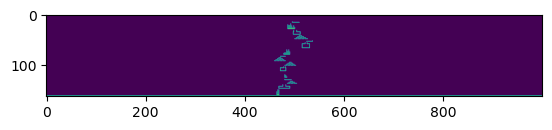

In [16]:
plt.imshow(roof)

In [17]:
sands = 0
while True:
    s = Sand(500,0)
    sands += 1
    s.move()
    if s.fallen:
        sands -= 1
        print('Not supposed to happen!')
        break
    elif roof[0,500] == 2:
        break

In [18]:
sands

24659

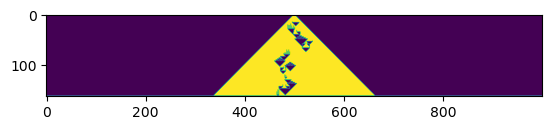

In [19]:
plt.imshow(roof)